# Reply on the feedback of Lab 2

Thanks for the feedback on my Lab 2 Assignment! Here's my response: 

## *Normally* on Line 4, Section 3.2 Question 2, Page 5

> "normally" have higher median?

What I mean is that based on the sample and the box-plot, we can generally infer that "cat people tend to have a higher life satisfaction score" than fish owners.

Apologies for the earlier miswording and ambiguity in the interpretation.

## About the cats

They usually come out in the early morning and late at night, as cats *normally* do. However, they are all around at various times. I even once witnessed the police and firefighters at our faculty, rescuing a young cat trapped on the roof!

# Main scenario story (Context)

![Warning - Health and Safety](./health-safety.jpg)

There are reports of increases in injuries related to playing games consoles. These injuries were attributed mainly to muscle and tendon strains. A researcher collected data from 120 participants who played on a Nintendo Switch or watched others playing. The outcome was a pain score from 0 to 10, where 0 is no pain and 10 is severe pain. The data are in `switch.sav`.

# Main scenario quests (Objectives)
1. Describe the distribution of the pain scores. Do you think the one-sample $𝑡$ test is suitable for this variable?
2. A pain score of 2 is considered as minor pain. Test whether the mean pain score is equal to 2 (two tailed, 5% level) and obtain the corresponding effect size.
3. Obtain a 95% confidence interval for the mean pain score.
4. Summary your findings from the previous questions in several sentences.
5. (Extra credit) Obtain a 95% confidence interval for the mean pain score of those who played on a Nintendo Switch. That is, exclude those who only watched others playing. (Hint: You learned how to exclude cases in Laboratory Assignment 1.)

# Solutions

## A peek on the dataset
As usual, I load modules that I may need in this laboratory assignment, then the dataset to my RAM and check attributes of the given dataset. 

In [14]:
import pandas as pd

# Load the dataset
switch = pd.read_spss('./datasets/switch.sav')

In [15]:
# Descriptions
print(f'Shape: \n', switch.shape, '\n')
print(f'Columns: \n', switch.columns, '\n')
print(f'First 5 rows: \n', switch.head(5), '\n')
print(f'Describe the column `injury`: \n', switch.describe(), '\n')

Shape: 
 (120, 5) 

Columns: 
 Index(['id', 'athlete', 'stretch', 'switch', 'injury'], dtype='object') 

First 5 rows: 
     id  athlete     stretch          switch  injury
0  ytv  Athlete  Stretching  Playing switch     2.0
1  wel  Athlete  Stretching  Playing switch     2.0
2  qfs  Athlete  Stretching  Playing switch     1.0
3  oln  Athlete  Stretching  Playing switch     2.0
4  wxi  Athlete  Stretching  Playing switch     0.0 

Describe the column `injury`: 
            injury
count  120.000000
mean     2.891667
std      1.994934
min      0.000000
25%      2.000000
50%      2.000000
75%      4.000000
max     10.000000 



## Q1: Distribution of the pain scores

###  Q1a: Describe the distribution

**Answer**

To describe the distribution of the pain scores, I use histogram with a kernel density estimation curve as shown in @fig-injury-histogram as well as measurements (mean, mode and median) reflect central tendency (see @tbl-centrality). 

|Measurement|Value|
|-----------|-----|
| Mode      | 2.00|
| Mean      | 2.89|
| Median    | 2.00|

: Mean, mode and median {#tbl-centrality}


According to the graph: 

1. Most of the observations are clustered around the lower pain scores (between 1 and 4), we can say that the distribution of pain scores is positively skewed rather than a perfect normal distribution. 
2. There is a noticeable peak at a score of 2, which means the most frequent score is around 2.
3. A long tail extends to the higher scores, indicating the frequency of pain scores gradually decreases as the scores increase.


**Solution**


In [16]:
injury = switch['injury']

# Calculate measurements of central tendency
injury_mean = injury.mean()
injury_mode = injury.mode()[0]
injury_median = injury.median()

# Tell the result
print(f'Central Tendency: \n')
print(f'Mean: ', injury_mean)
print(f'Mode: ', injury_mode)
print(f'Median: ', injury_median)

Central Tendency: 

Mean:  2.8916666666666666
Mode:  2.0
Median:  2.0


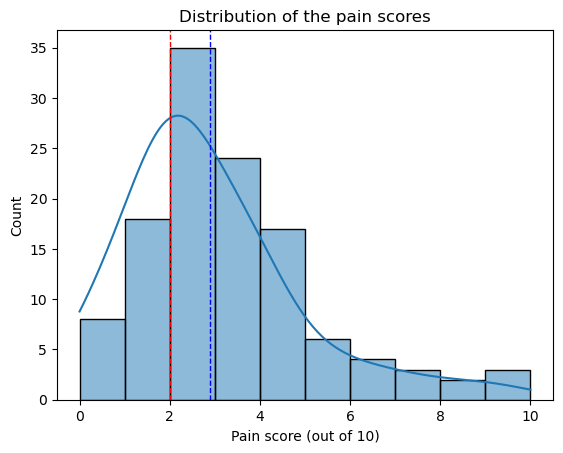

In [17]:
#| label: fig-injury-histogram
#| fig-cap: Distribution of the pain scores

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histogram
injury_hist = sns.histplot(switch, x='injury', stat='count', bins=10 ,kde=True)
# Dashed line for Mean, Median and Mode
injury_hist.axvline(injury_mean, color='blue', linestyle='--', linewidth=1)
injury_hist.axvline(injury_median, color='red', linestyle='--', linewidth=1)
# Set title and labels
injury_hist.set_title('Distribution of the pain scores')
injury_hist.set_xlabel('Pain score (out of 10)')
# Show the plot
plt.show()


### Q1b: One-sample $𝑡$ test on this variable

**Answer**

Recall back the the slides in the lecture notes: 

> One‐sample $t$ test requires that: 
> 
>  - Sample mean describes central tendency. 

The sample mean is slightly higher than the mode and median (see @tbl-centrality and @fig-injury-histogram, red dashed lines for the median and mode, blue for the mean) since the data is right-skewed. However, they are fairly close to each other, so the sample mean can still represent central tendency.

>  - Scores in the sample are randomly selected from the population

According to the description, the data was "collected from 120 participants who played on a Nintendo Switch or watched others playing." For the sake of this assignment, I will assume that the participants were randomly selected from patients worldwide to fulfill the random sampling assumption.

>  - Either $N$ is large or $X$ follows a normal distribution

Given the right-skewed distribution as seen in @fig-injury-histogram, the data may violate the assumption of normality required for the one-sample $t$-test. However, the *Central Limit Theorem* suggests that if the sample size is large (typically $N > 30$), the sampling distribution of the sample mean tends to approach normality. Therefore, despite the skewed distribution, the sample size ($N = 120$) makes the one-sample $t$-test acceptable in this case.

Additionally, question 2 specifically asks for a one-sample $t$-test without requiring further preprocessing of data (e.g., a log transformation), which further supports the applicability of the one-sample $t$-test to this data. If the data were unusable, there would be no reason to include the following questions.

In conclusion, a one-sample $t$-test is suitable for this dataset.

## Q2: Mean of pain score tested

**Answer**

1. $p$ value

    $p \approx 3.11 \times 10^{-6}$

    At a 5% significance level ($\alpha = 0.05$), $p < 0.001$, we reject the null hypothesis. The mean pain score is significantly different from 2 (a minor pain) at the 5% level.

2. The Cohen's $d$ value

    $d \approx 0.45$

    The Cohen's $d$ value indicates a medium effect. This suggests that the difference between the mean pain score ($M = 2.89$) and the a minor pain ($\mu_{hyp} = 2$) is meaningful in practical terms.

**Solution**

Given $N = 120$, $M \approx 2.89$, $SD \approx 1.99$, $\mu_{hyp} = 2$, the standard error $SE_M$ is: 

$$
SE_M = \frac{SD}{\sqrt{N}} \approx 0.18
$$

In [18]:
from math import sqrt

# Standard Error Mean
# Note: I can use injury.sem() directly to get the result, 
# but I shall calculate by my own for this assignment. 

injury_sem = injury.std(ddof=1) / sqrt(120)
print(f'Standard Error Mean: ', injury_sem)

Standard Error Mean:  0.1821117309227567



With $SE_M \approx 0.18$, the $t$ ratio is: 

$$
t = \frac{M - \mu_{hyp}}{SE_{M}} \approx 4.90
$$

In [19]:
# t statistic
injury_t = (injury.mean() - 2) / injury.sem()
print(f't: ', injury_t)

t:  4.8962615540943375


Unfortunately, I can't calculate the $p$-value on hand, so in this part I'll call `scipy.stats.t` for help. the degree of freedom ($df$) is: 

$$
df = N - 1 = 120 - 1 = 119
$$

With $t \approx 4.90$ and $df = 119$, then use survivor function to reach the $p$-value: 
$$
p \approx 3.11 \times 10^{-6}
$$

In [20]:
import scipy.stats as stats

# 119 is the degree of freedom; Two-sided times two
injury_p = stats.t.sf(injury_t, 119 ) * 2

print(f'p: ', injury_p)

p:  3.1051091723547962e-06


The $p$-value is much smaller than 0.001 ($p < 0.001$), the null hypothesis should be rejected.

I also did a sanity check with the ready-to-use function `scipy.stats.ttest_1samp`: 

In [21]:
# A san-check on my calculation result: 

injury_ttest_1samp = stats.ttest_1samp(injury, 2, alternative='two-sided')

print(f't: ', injury_ttest_1samp.statistic, '\n'
      'df: ', injury_ttest_1samp.df, '\n'
      'p-value: ', injury_ttest_1samp.pvalue)

t:  4.8962615540943375 
df:  119 
p-value:  3.1051091723547962e-06


The Cohen's d value is: 

$$
d = \frac{M - \mu_{hyp}}{SD} = \frac{t}{\sqrt{N}} \approx 0.45
$$

In [22]:
# Effect Size d

injury_d = injury_t / sqrt(120)
print(f'Cohen\'s d:', injury_d)

Cohen's d: 0.4469654834371283


## Q3: 95% confidence interval for the mean pain score: 

**Answer**

Based on the sample of $N = 120$ pain scores, with $M \approx 2.89$ and $SD \approx 1.99$, the 95% CI for pain scores is $[2.53, 3.24]$.

**Solution**

Given $c = 1.96$ for a 95% confidence interval and $SE_M \approx 0.18$ as calculated in the last section, a 95% confidence interval of the mean pain score is: 

$$
[M - c \times SE_M, M + c \times SE_M] \approx [2.53, 3.25]
$$

In [23]:
# CI for two-tailed t-statistics
def confidence_interval(alpha, mean, sem, df): 
    c = stats.t.interval(1 - alpha, df)[1]
    ci_upper = mean + (c * sem)
    ci_lower = mean - (c * sem)
    print(f'CI (Lower): ', ci_lower)
    print(f'CI (Upper): ', ci_upper)
    return str(f'[{ci_lower}, {ci_upper}]')

injury_ci = confidence_interval(0.05, injury_mean, injury_sem, 119)
print(injury_ci)

CI (Lower):  2.53106725077079
CI (Upper):  3.252266082562543
[2.53106725077079, 3.252266082562543]


## Q4: Summarizing the findings

**Answer**

A one‐sample $t$-test is conducted to reveal whether mean pain score for a sample of $N = 120$ patients differed from the minor pain with a score of 2. For this example, $M = 2.89$, $SD = 1.99$ and $SE_M = 0.18$. The 95% CI for $M$ was $[2.53, 3.25]$. The result was $t(119) = 4.90$, %p = 3.11 \times 10^-6$, two tailed. The effect size is $d = 0.45$ by Cohen’s standards, which represents a medium effect. The difference between the sample mean ($M = 2.89$) and the score of minor pain (2) is statistically significant using $\alpha = 0.05$, two tailed.

## Q5: 95% confidence interval for Switch players

**Answer**

The 95% confidence interval for the mean pain score of those who played on a Nintendo Switch is $[3.14, 4.33]$. 


**Solution**

1. Check the structure of column `switch` then apply the filtering: 

In [24]:
# Check how many people get injured while playing
print(f'Variables in the column switch: \n', switch['switch'].value_counts())
# Filter out all switch players
injury_ns = switch[switch['switch'] == 'Playing switch']['injury']
# And a sanity check
print(f'Filtered data: \n', injury_ns.describe())

Variables in the column switch: 
 switch
Playing switch     60
Watching switch    60
Name: count, dtype: int64
Filtered data: 
 count    60.000000
mean      3.733333
std       2.313312
min       0.000000
25%       2.000000
50%       3.500000
75%       5.000000
max      10.000000
Name: injury, dtype: float64


2. Calculating the CI: 

Given $N_{player} = 60$, then the $df_{player} = N_{player} - 1 = 59$,  
Based on the data we also have $M_{player} \approx 3.73$ and $SE_{M_{player}} \approx 0.30$

The 95% confidence interval for the mean pain score of those who played on a Nintendo Switch is: 

$$
[M - c \times SE_M, M + c \times SE_M] \approx [3.14, 4.33]
$$

In [25]:
injury_ns_mean = injury_ns.mean()
injury_ns_sem = injury_ns.sem()
injury_ns_dregf = len(injury_ns) - 1

print(f'Sample size: {len(injury_ns)}, \n'
      f'Degree of Freedom: {injury_ns_dregf},\n'
      f'Mean: {injury_ns_mean},\n'
      f'Standard Error: {injury_ns_sem}')

injury_ns_ci = confidence_interval(0.05, injury_ns_mean, injury_ns_sem, injury_ns_dregf)
print(f'\nThe 95% CI for Switch players: \n', injury_ns_ci)

Sample size: 60, 
Degree of Freedom: 59,
Mean: 3.7333333333333334,
Standard Error: 0.29864729557842784
CI (Lower):  3.1357414752023387
CI (Upper):  4.3309251914643285

The 95% CI for Switch players: 
 [3.1357414752023387, 4.3309251914643285]
